In [ ]:
import  tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATA_DIR=r'/content/drive/MyDrive/FINAL_PROJECT/New database pictures/training_set'
TEST_DATA_DIR=r'/content/drive/MyDrive/FINAL_PROJECT/New database pictures/test_set'
VALID_DATA_DIR=r'/content/drive/MyDrive/FINAL_PROJECT/New database pictures/validation_set'

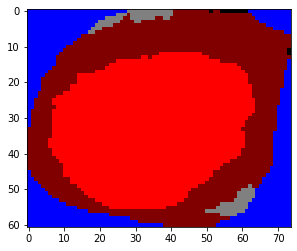

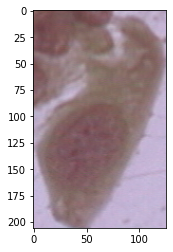

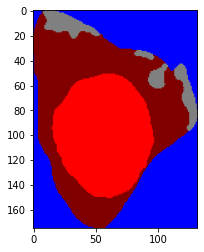

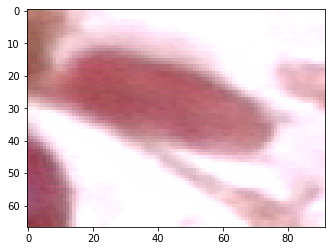

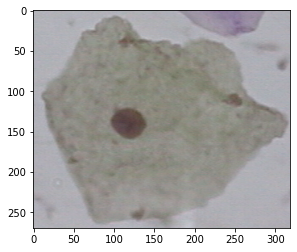

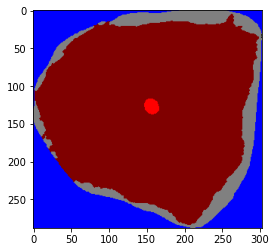

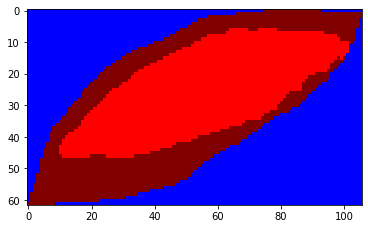

In [ ]:
class_list=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']
for categories in class_list:
    path=os.path.join(DATA_DIR,categories)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break

In [ ]:
IMG_SIZE=128

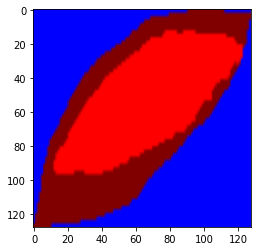

In [ ]:
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
training_data=[]
def create_training_data():
    for categories in class_list:
        path=os.path.join(DATA_DIR,categories,)
        class_num=class_list.index(categories)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
validation_data=[]
def create_validation_data():
    for categories in class_list:
        path=os.path.join(VALID_DATA_DIR,categories,)
        class_num=class_list.index(categories)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass
create_validation_data()

In [ ]:
testing_data=[]
def create_testing_data():
    for categories in class_list:
        path=os.path.join(TEST_DATA_DIR,categories,)
        class_num=class_list.index(categories)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [ ]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

1470
182
182


In [ ]:
train_datagen =  ImageDataGenerator(zoom_range=0.2,
      preprocessing_function=preprocess_input,
      zca_whitening=False,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      rotation_range=45,
      horizontal_flip=True,
      vertical_flip=True
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(DATA_DIR, 
                                                    target_size=(IMG_SIZE, IMG_SIZE), 
                                                    batch_size=20)

Found 1470 images belonging to 7 classes.


In [ ]:
train_x=[]
train_y=[]
val_x = []
val_y = []
test_x=[]
test_y=[]

In [ ]:
for features,labels in training_data:
    train_x.append(features)
    train_y.append(labels)

In [ ]:
for features,labels in validation_data:
    val_x.append(features)
    val_y.append(labels)

In [ ]:
for features,labels in testing_data:
    test_x.append(features)
    test_y.append(labels)

In [ ]:
val_x=np.array(val_x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
train_x=np.array(train_x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_x=np.array(test_x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
val_y=np.array(val_y)
train_y=np.array(train_y)
test_y=np.array(test_y)


In [ ]:
from sklearn import preprocessing
oe = preprocessing.LabelEncoder()
oe.fit(test_y)
test_labels_encoded = oe.transform(test_y)
oe.fit(train_y)
train_labels_encoded = oe.transform(train_y)
oe.fit(val_y)
val_labels_encoded = oe.transform(val_y)


In [ ]:
train_x=train_x/255.0
val_x=val_x/255.0
test_x=test_x/255.0
val_x.shape

(182, 128, 128, 3)

In [ ]:
from keras.utils import to_categorical
test_y = to_categorical(test_y)
#train_y = to_categorical(train_y)

val_y = to_categorical(val_y)
val_y.shape

(182, 7)

In [ ]:
train_y.shape

(1470,)

In [ ]:
class_list=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

In [ ]:
from tensorflow.keras.layers import Input
input=Input(shape=(IMG_SIZE,IMG_SIZE,3))

In [ ]:
from keras.optimizers import SGD, Adam
#from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

NUM_EPOCHS = 10
BATCH_SIZE=10
num_of_train_images=1470

adam = Adam(lr=0.001)

In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout ,Conv2D ,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model

In [ ]:
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(128, 128, 3))
base_model.trainable = False
cancer = Sequential()
cancer.add(base_model)
cancer.add(Conv2D(filters=64,kernel_size=3,input_shape=[IMG_SIZE,IMG_SIZE,3],padding='same',activation='relu'))
cancer.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cancer.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
cancer.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cancer.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cancer.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
cancer.add(Flatten())
x=cancer.output

In [ ]:

#x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
#prediction_layer = Dense(7, activation = 'softmax')(x)


#cnn_model = Model(inputs=cancer.input, outputs=prediction_layer)
#cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
#print(cnn_model.summary()) 
#history = cnn_model.fit(train_x, , epochs=10, validation_data = (val_x,val_y ))

In [ ]:
cancer.add(Dense(1024, activation='relu'))
cancer.add(Dense(256, activation='relu'))
cancer.add(Dense(7, activation='sigmoid'))

cancer.summary()
cancer.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = cancer.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_of_train_images // BATCH_SIZE, 
                                       shuffle=True,validation_data=(val_x,val_y))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1179712   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)        

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
147/147 [==============================] - 181s 1s/step - loss: 1.6918 - accuracy: 0.2745 - val_loss: 2.0228 - val_accuracy: 0.1429
Epoch 2/10
147/147 [==============================] - 177s 1s/step - loss: 1.2780 - accuracy: 0.4416 - val_loss: 2.0253 - val_accuracy: 0.1429
Epoch 3/10
147/147 [==============================] - 178s 1s/step - loss: 1.2051 - accuracy: 0.4730 - val_loss: 2.3054 - val_accuracy: 0.1429
Epoch 4/10
147/147 [==============================] - 178s 1s/step - loss: 1.1327 - accuracy: 0.5133 - val_loss: 2.5414 - val_accuracy: 0.1429
Epoch 5/10
147/147 [==============================] - 178s 1s/step - loss: 1.0880 - accuracy: 0.5259 - val_loss: 2.9067 - val_accuracy: 0.1429
Epoch 6/10
147/147 [==============================] - 178s 1s/step - loss: 1.0995 - accuracy: 0.5323 - val_loss: 2.7549 - val_accuracy: 0.1209
Epoch 7/10
147/147 [==============================] - 178s 1s/step - loss: 1.0829 - accuracy: 0.5384 - val_loss: 3.0026 - val_accuracy: 0.1429

In [ ]:
##Random forest

X_rf = cancer.predict(train_x)
#X_rf=X_rf.reshape(X_rf.shape[0],-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
X_rf.shape
train_x.shape

(1470, 128, 128, 3)

In [ ]:
RF_model.fit(X_rf,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
test_x=np.array(test_x)
X_test_feature = cancer.predict(test_x)
#X_test_feature=X_test_feature.reshape(X_test_feature.shape[0],-1)

In [ ]:
test_y.shape

(182, 7)

In [ ]:
prediction_RF = RF_model.predict(X_test_feature)

In [ ]:
prediction_RF = oe.inverse_transform(prediction_RF)

In [ ]:
rounded_labels=np.argmax(test_y,axis=-1)
print(rounded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(rounded_labels, prediction_RF))

Accuracy =  0.23626373626373626
